# Data Visualization and Statistics Tips

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm
from scipy.stats import norm

## Probablity

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


We can visualize the curve. Import norm from scipy.stat and plot graph with matplotlib

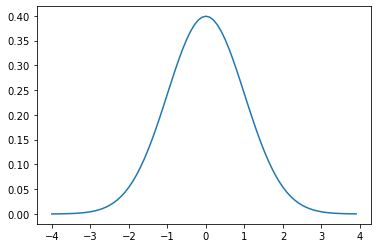

In [3]:
# Plot between -4 and 4 with 0.1 steps.
x_axis = np.arange(-4, 4, 0.1)
# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

Find the mean and standard deviation of teachers' evaluation scores

In [4]:
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


Use the scipy.stats module. Because python only looks to the left i.e. less than, we do a remove the probability from 1 to get the other side of the tail

In [5]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


First we find the probability of getting evaluation scores less than 3.5 using the <code>norm.cdf</code> function

In [6]:
x1 = 3.5
prob1 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


### Using the two-tailed test from a normal distribution:

-   A professional  basketball  team wants to compare its performance with  that of players  in a regional league.
-   The pros are known to have a historic mean of 12 points  per game with  a standard  deviation  of 5.5. 
-   A group  of 36 regional players recorded on average 10.7 points  per game.
-   The pro coach would like to know whether  his professional  team scores on average are different from that of the regional players.

State the null hypothesis

-   $H_0$: $x = µ_1$ ("The mean point of the regional players is not different from the historic mean")
-   $H_1$: $x ≠ µ_1$ ("The mean point of the regional players is different from the historic mean")

In [7]:
## because it is a two-tailed test we multiply by 2
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/sqrt(36))), 3)

0.156

## Descriptive Statistics

In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [9]:
print(ratings_df.shape)
print(ratings_df['students'].mean())
print(ratings_df['students'].median())
print(ratings_df['students'].min())
print(ratings_df['students'].max())

(463, 19)
36.62419006479482
23.0
5
380


In [10]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <a list of 10 Patch objects>)

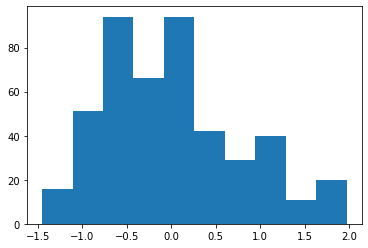

In [11]:
plt.hist(ratings_df['beauty'])

Use a group by gender to view the mean scores of the beauty we can say that beauty scores differ by gender as the mean beauty score for women is higher than men

In [12]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?

First groupby to get the total sum

In [13]:
tenure_count = ratings_df.groupby('gender').agg({'tenure': 'count'}).reset_index()

Find the percentage

In [14]:
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,195,42.116631
1,male,268,57.883369


## Hypothesis Testing

T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance

State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in evaluation scores between male and females")

We can plot the dependent variable with a historgram

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

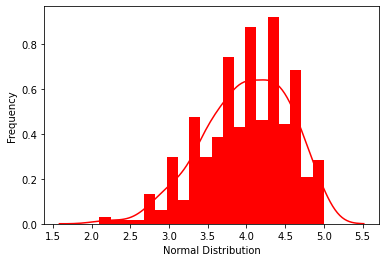

In [15]:
ax = sns.distplot(ratings_df['eval'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [16]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.1903292243529225, pvalue=0.6628469836244741)

In [17]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)

ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable, using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

- 40 years and younger
- between 40 and 57 years
- 57 years and older

In [18]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

State the hypothesis

- 𝐻0:  µ1=µ2=µ3  (the three population means are equal)
- 𝐻1:  At least one of the means differ

Test for equality of variance

In [19]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

First, separate the three samples (one for each job category) into a variable each.

In [20]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

Now, run a one-way ANOVA.

In [21]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

ANOVA: Using the teachers' rating data set, does teaching evaluation score for instructors differ by age?

Test for equality of variance

In [22]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')

forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1.2226327996572204, P-Value: 0.29540894225417536


Conclusion: Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.

Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?

In [23]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


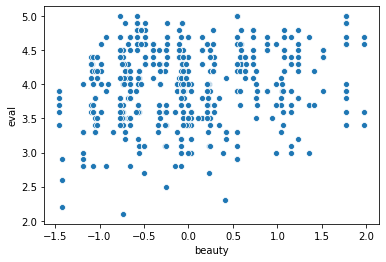

In [24]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [25]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

(0.18903909084045212, 4.247115419812614e-05)

## Data Visualization

Identify all duplicate cases using prof variable - find the unique values of the prof variables

In [26]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69])

Print out the number of unique values in the prof variable

In [27]:
ratings_df.prof.nunique()

94

Using all observations, Find the average and standard deviation for age

In [28]:
print(ratings_df['age'].mean())
print(ratings_df['age'].std())

48.365010799136066
9.80274203786482


Repeat the analysis by first filtering the data set to include one observation for each instructor with a total number of observations restricted to 94.

first we drop duplicates using prof as a subset and assign it a new dataframe name called no_duplicates_ratings_df

In [29]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset =['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1,57 years and older
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1,between 40 and 57 years
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1,40 years and younger
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1,40 years and younger


Use the new dataset to get the mean of age

In [30]:
no_duplicates_ratings_df['age'].mean()
no_duplicates_ratings_df['age'].std()

10.25651329515495

Using a bar chart, demonstrate if instructors teaching lower-division courses receive higher average teaching evaluations.

In [31]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1,40 years and younger
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1,40 years and younger
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1,40 years and younger
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1,57 years and older


Find the average teaching evaluation in both groups of upper and lower-division

In [32]:
division_eval = ratings_df.groupby('division')[['eval']].mean().reset_index()

Plot the barplot using the seaborn library

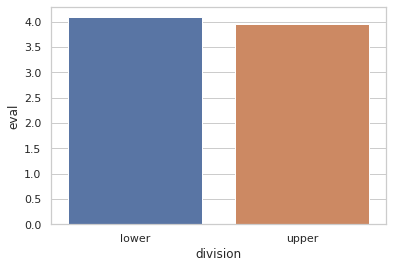

In [33]:
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)

Plot the relationship between age and teaching evaluation scores.

Create a scatterplot with the scatterplot function in the seaborn library

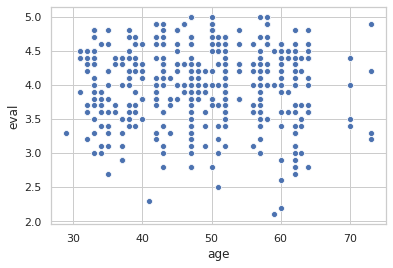

In [34]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)

Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

Create a scatterplot with the scatterplot function in the seaborn library this time add the hue argument

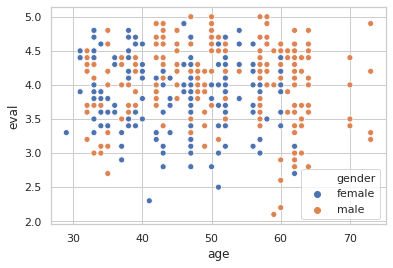

In [35]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',
                     data=ratings_df)

Create a box plot for beauty scores differentiated by credits.

We use the boxplot() function from the seaborn library

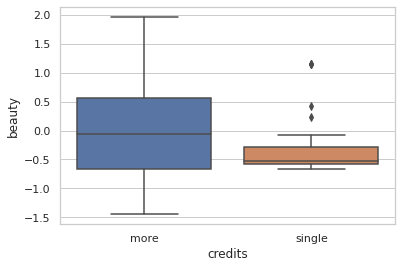

In [36]:
ax = sns.boxplot(x='credits', y='beauty', data=ratings_df)

What is the number of courses taught by gender?

We use the catplot() function from the seaborn library

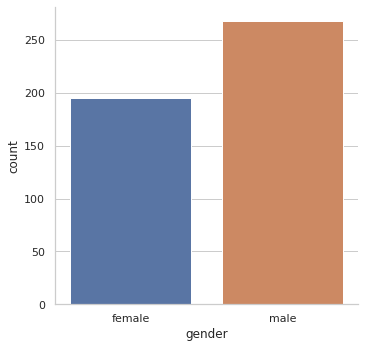

In [37]:
sns.catplot(x='gender', kind='count', data=ratings_df)

Create a group histogram of taught by gender and tenure

We will add the hue = Tenure argument

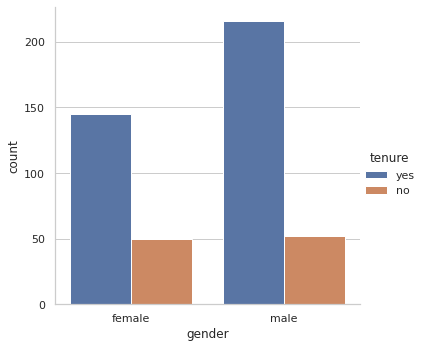

In [38]:
sns.catplot(x='gender', hue = 'tenure', kind='count', data=ratings_df)

Add division as another factor to the above histogram

We add another argument named row and use the division variable as the row

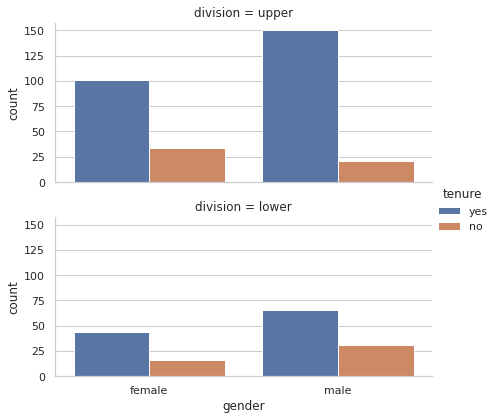

In [39]:
sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=ratings_df,
            height = 3, aspect = 2)

Create a scatterplot of age and evaluation scores, differentiated by gender and tenure

Use the relplot() function for complex scatter plots

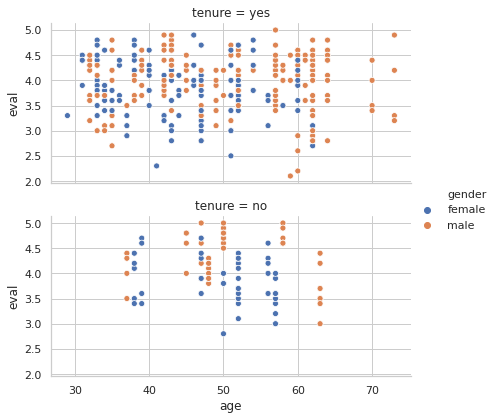

In [40]:
sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

Create a distribution plot of teaching evaluation scores

We use the distplot() function from the seaborn library, set kde = false because we don'e need the curve

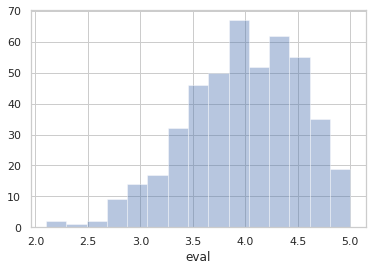

In [41]:
ax = sns.distplot(ratings_df['eval'], kde = False)

Create a distribution plot of teaching evaluation score with gender as a factor

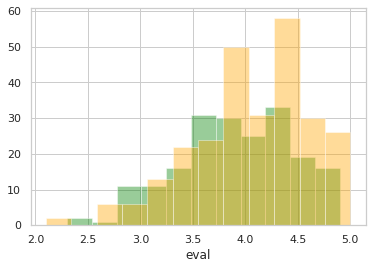

In [42]:
## use the distplot function from the seaborn library
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False) 
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="orange", kde=False) 
plt.show()

Create a box plot - age of the instructor by gender

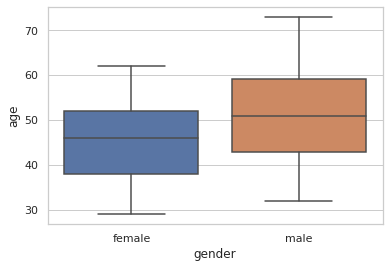

In [43]:
ax = sns.boxplot(x="gender", y="age", data=ratings_df)

Compare age along with tenure and gender

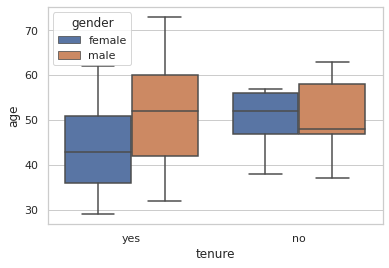

In [44]:
ax = sns.boxplot(x="tenure", y="age", hue="gender",
                 data=ratings_df)

## Regression Analysis

In this section, you will learn how to run regression analysis in place of the t-test, ANOVA, and correlation

Regression with T-test: Using the teachers rating data set, does gender affect teaching evaluation rates?

Initially, we had used the t-test to test if there was a statistical difference in evaluations for males and females, we are now going to use regression. We will state the null hypothesis:

- 𝐻0:β1  = 0 (Gender has no effect on teaching evaluation scores)
- 𝐻1:β1  is not equal to 0 (Gender has an effect on teaching evaluation scores)

We will use the female variable. female = 1 and male = 0

In [45]:
## X is the input variables (or independent variables)
X = ratings_df['female']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 13 Nov 2020   Prob (F-statistic):            0.00124
Time:                        19:18:00   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in mean evaluation scores based on gender. The coefficient -0.1680 means that females get 0.168 scores less than men.

Regression with ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?

State the Hypothesis:

- 𝐻0:µ1=µ2=µ3  (the three population means are equal)
- 𝐻1:  At least one of the means differ
- Then we group the data like we did with ANOVA

In [46]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

Use OLS function from the statsmodel library

In [47]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


Conclusion: We can also see the same values for ANOVA like before and we will reject the null hypothesis since the p-value is less than 0.05 there is significant evidence that at least one of the means differ.

Regression with ANOVA option 2

Create dummy variables - A dummy variable is a numeric variable that represents categorical data, such as gender, race, etc. Dummy variables are dichotomous, i.e they can take on only two quantitative values.

In [48]:
X = pd.get_dummies(ratings_df[['age_group']])
y = ratings_df['beauty']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     17.60
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.32e-08
Time:                        19:18:00   Log-Likelihood:                -529.47
No. Observations:                 463   AIC:                             1065.
Df Residuals:                     460   BIC:                             1077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0138      0.028      0.496      0.620      -0.041       0.069
age_group_40 years and younger        0.3224      0.058      5.574      0.000       0.209       0.436
age_group_57 years and older         -0.2596      0.056     -4.621      0.000      -0.370      -0.149
age_group_between 40 and 57 years    -0.0489      0.045     -1.081      0.280      -0.138       0.040
==============================================================================
Omnibus:                       11.586   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.114
Skew:                           0.394   Prob(JB):                      0.00234
Kurtosis:                       2.913   Cond. No.                     7.06e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

You will get the same results and conclusion

Correlation: Using the teachers' rating dataset, Is teaching evaluation score correlated with beauty score?

In [49]:
## X is the input variables (or independent variables)
X = ratings_df['beauty']
## y is the target/dependent variable
y = ratings_df['eval']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.25e-05
Time:                        19:18:00   Log-Likelihood:                -375.32
No. Observations:                 463   AIC:                             754.6
Df Residuals:                     461   BIC:                             762.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9983      0.025    157.727      0.000       3.948       4.048
beauty         0.1330      0.032      4.133      0.000       0.070       0.196
==============================================================================
Omnibus:                       15.399   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.405
Skew:                          -0.453   Prob(JB):                     0.000274
Kurtosis:                       2.831   Cond. No.                         1.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between beauty and evaluation scores